#Le TP consiste à charger un fichier CSV contenant des données sur le diabète. L'objectif est d'utiliser quatre modèles d'apprentissage automatique (SVM, k-NN, arbre de décision et k-means) pour prédire et évaluer la présence ou l'absence de diabète chez les patients. Vous allez comparer les performances des différents modèles en calculant leur score respectif et en identifiant le meilleur modèle pour la prédiction du diabète.

1-Importer tous les bibliotheques

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

2-Load de données

In [68]:
data=pd.read_csv('/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3-Selectionner le X et le Y

In [69]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

4-Afficher une nuage pour mieux présenter les données

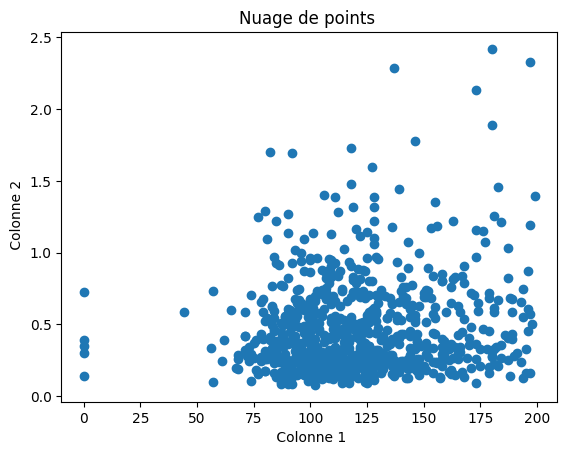

In [70]:
plt.scatter(X[:, 1], X[:,-2])
plt.xlabel(' Colonne 1')
plt.ylabel(' Colonne 2')
plt.title('Nuage de points ')
plt.show()

1-Diviser les données en ensembles d'entraînement et de test

In [71]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Calcul de score avec la méthode SVM

1-Afficher le score avec le modèle SVM avec un noyau linéaire

In [72]:
# Créer le modèle SVM avec un noyau linéaire
model = svm.SVC(kernel='linear')

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, Y_train)

# Faire des prédictions sur les données de test
svm_predictions = model.predict(X_test)

score_linéaire = accuracy_score(Y_test, svm_predictions)

# Calculer le score sur les données de test
score = model.score(X_test, Y_test)
print("Score du modèle SVM linéaire avec accuracy_score :", score_linéaire)
print("Score du modèle SVM linéaire avec model.score:", score)


Score du modèle SVM linéaire avec accuracy_score : 0.7532467532467533
Score du modèle SVM linéaire avec model.score: 0.7532467532467533


2-Affichager l'hyperplan séparateur

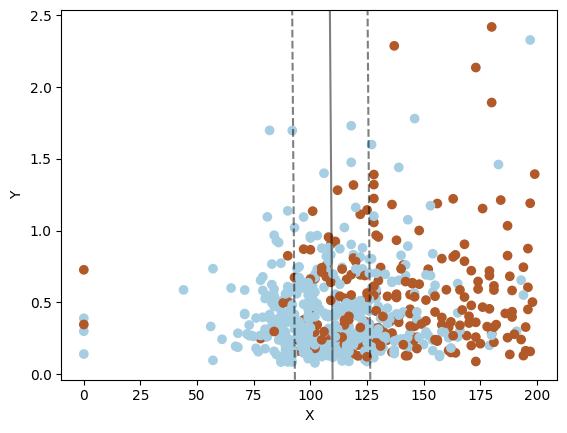

In [73]:
# Définition des coordonnées x et y pour le nuage de points
x = X_train[:, 1]   # Utilisez la deuxième colonne comme coordonnée x
y = X_train[:,-2]   # Utilisez la sixième colonne comme coordonnée y

# Affichage du nuage de points
plt.scatter(x, y, c=Y_train, cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')

# Affichage de l'hyperplan séparateur
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel(), np.zeros_like(XX.ravel()), np.zeros_like(XX.ravel()), np.zeros_like(XX.ravel()), np.zeros_like(XX.ravel()), np.zeros_like(XX.ravel()), np.zeros_like(XX.ravel())]).T
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()

3-Afficher le score avec le modèle SVM avec un noyau Polyminiale

In [74]:
best_score_poliminiale = 0
best_degree = 0

for degree in range(1, 10):  # Testez différents degrés de 1 à 9
    model = svm.SVC(kernel='poly', degree=degree)
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    
    if score > best_score_poliminiale :
        best_score_poliminiale  = score
        best_degree = degree

print("Meilleur score :", best_score_poliminiale )
print("Meilleur degré :", best_degree)


Meilleur score : 0.7662337662337663
Meilleur degré : 5


#Calcul de score avec la méthode KNN

1-Afficher le score avec le modèle KNN

In [75]:

best_score_knn = 0
best_k = 0

for k in range(1, 10):  # Testez différents k de 1 à 9
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    
    if score > best_score_knn:
        best_score_knn = score
        best_k = k

print("Meilleur k :", best_k)
print("Meilleur score :", best_score_knn)

Meilleur k : 8
Meilleur score : 0.7467532467532467


#Calcul de score avec la méthode d'arbre de décision

1-Afficher le score avec le modèle d'arbre de décision

In [76]:

best_score_ad = 0
best_max_depth = 0

for max_depth in range(1, 20):  # Testez différentes profondeurs de 1 à 9
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    score = accuracy_score(Y_test, predictions)
    
    if score > best_score_ad:
        best_score_ad = score
        best_max_depth = max_depth

print("Meilleure profondeur :", best_max_depth)
print("Meilleur score :", best_score_ad)


Meilleure profondeur : 5
Meilleur score : 0.7922077922077922


Calcul de score avec la méthode d'arbre de Kmeans

1-Afficher le score avec le modèle de Kmeans

Score K-means: 0.33116883116883117


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


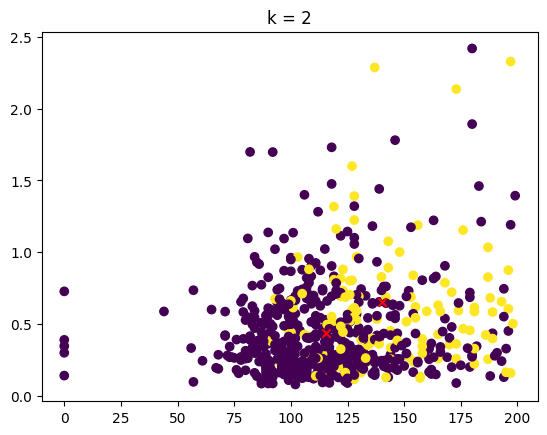

In [77]:
# Appliquer K-means pour obtenir les clusters
k = 2
kmeans = KMeans(n_clusters=k)
labels_train=kmeans.fit_predict(X_train)  # Utiliser X_train, les données d'entraînement

#création de labels_test pour calculer le score par la suite
labels_test=kmeans.fit_predict(X_test)  # Utiliser X_test, les données de test
# Obtenir les centres de cluster
centers = kmeans.cluster_centers_

# Calculate accuracy score
score_kmeans = accuracy_score(Y_test, labels_test)
print("Score K-means:", score_kmeans)

# Tracer le nuage de points
plt.scatter(X_train[:, 1], X_train[:, -2], c=labels_train, cmap='viridis')
plt.scatter(centers[:, 1], centers[:, -2], c='red', marker='x')
plt.title(f'k = {k}')
plt.show()


#comparison entre les scores pour cahques modèle

In [78]:
print("Score du modèle SVM linéaire :", score_linéaire)
print("Score du modèle SVM Polyminiale :", best_score_poliminiale)
print("Score du modèle Knn :", best_score_knn)
print("Score du modèle AD :", best_score_ad)
print("Score K-means:", score_kmeans)

Score du modèle SVM linéaire : 0.7532467532467533
Score du modèle SVM Polyminiale : 0.7662337662337663
Score du modèle Knn : 0.7467532467532467
Score du modèle AD : 0.7922077922077922
Score K-means: 0.33116883116883117
